In [1]:
#load necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings('ignore')

#### Importing Data


In [2]:
df1=pd.read_csv('final_data_2.csv',usecols=['user_id', 'total_clicks', 'total_sessions','total_bags','total_hotel_spend', 'total_flights_spend', 'ads_per_km', 'recency',
       'frequency','age',
       'gender', 'married', 'has_children', 'total_cancellation',
       'avg_session_time'])
pd.set_option('display.max_columns', None)
df1.head()

,user_id,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,gender,married,has_children,total_cancellation,avg_session_time
0,23557,82,8,0,3802,0.00,0.000000,14.0,2,64,F,1,0,0,76.625000
1,94883,73,8,1,130,864.09,0.000000,109.0,4,51,F,1,0,0,67.750000
2,101486,131,8,0,2199,189.91,0.000000,41.0,3,50,F,1,1,0,122.250000
3,101961,126,8,2,2429,1242.66,0.000727,36.0,10,43,F,1,0,0,117.750000
4,106907,240,8,10,8514,27804.12,0.000000,1.0,4,45,F,1,1,1,758.915066


In [3]:
df2=pd.read_csv('data5.csv')
df2.head()

,user_id,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,home_country,home_city,home_airport,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights
0,167852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.10,2.0,0.100,0.0,0.0,NaN,0,usa,tampa,MCF,NaN,NaN,NaN
1,181157,1.0,3.0,0.15,0.15,0.15,0.15,0.15,1.0,3.0,0.15,0.15,0.15,0.15,0.15,1.0,0.20,0.0,0.000,0.0,NaN,3640.372453,3,usa,houston,HOU,0.0,1.0,3.33
2,252835,1.0,5.0,0.30,0.30,0.30,0.30,0.30,0.0,4.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.0,0.050,NaN,0.0,9296.195562,4,usa,chicago,ORD,0.0,0.0,2.75
3,283325,1.0,1.0,0.10,0.10,0.10,0.10,0.10,0.0,2.0,0.00,0.00,0.00,0.00,0.00,1.0,0.05,1.0,0.100,0.0,0.0,2838.442947,1,usa,dallas,DAL,0.0,0.0,3.00
4,299476,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.00,0.00,2.0,0.20,2.0,0.125,0.0,0.0,1090.000407,1,usa,atlanta,ATL,0.0,0.0,1.00


In [4]:
#Merging Data
df = pd.merge(df1, df2, on='user_id', how='inner')  # 'inner' means only common user_ids

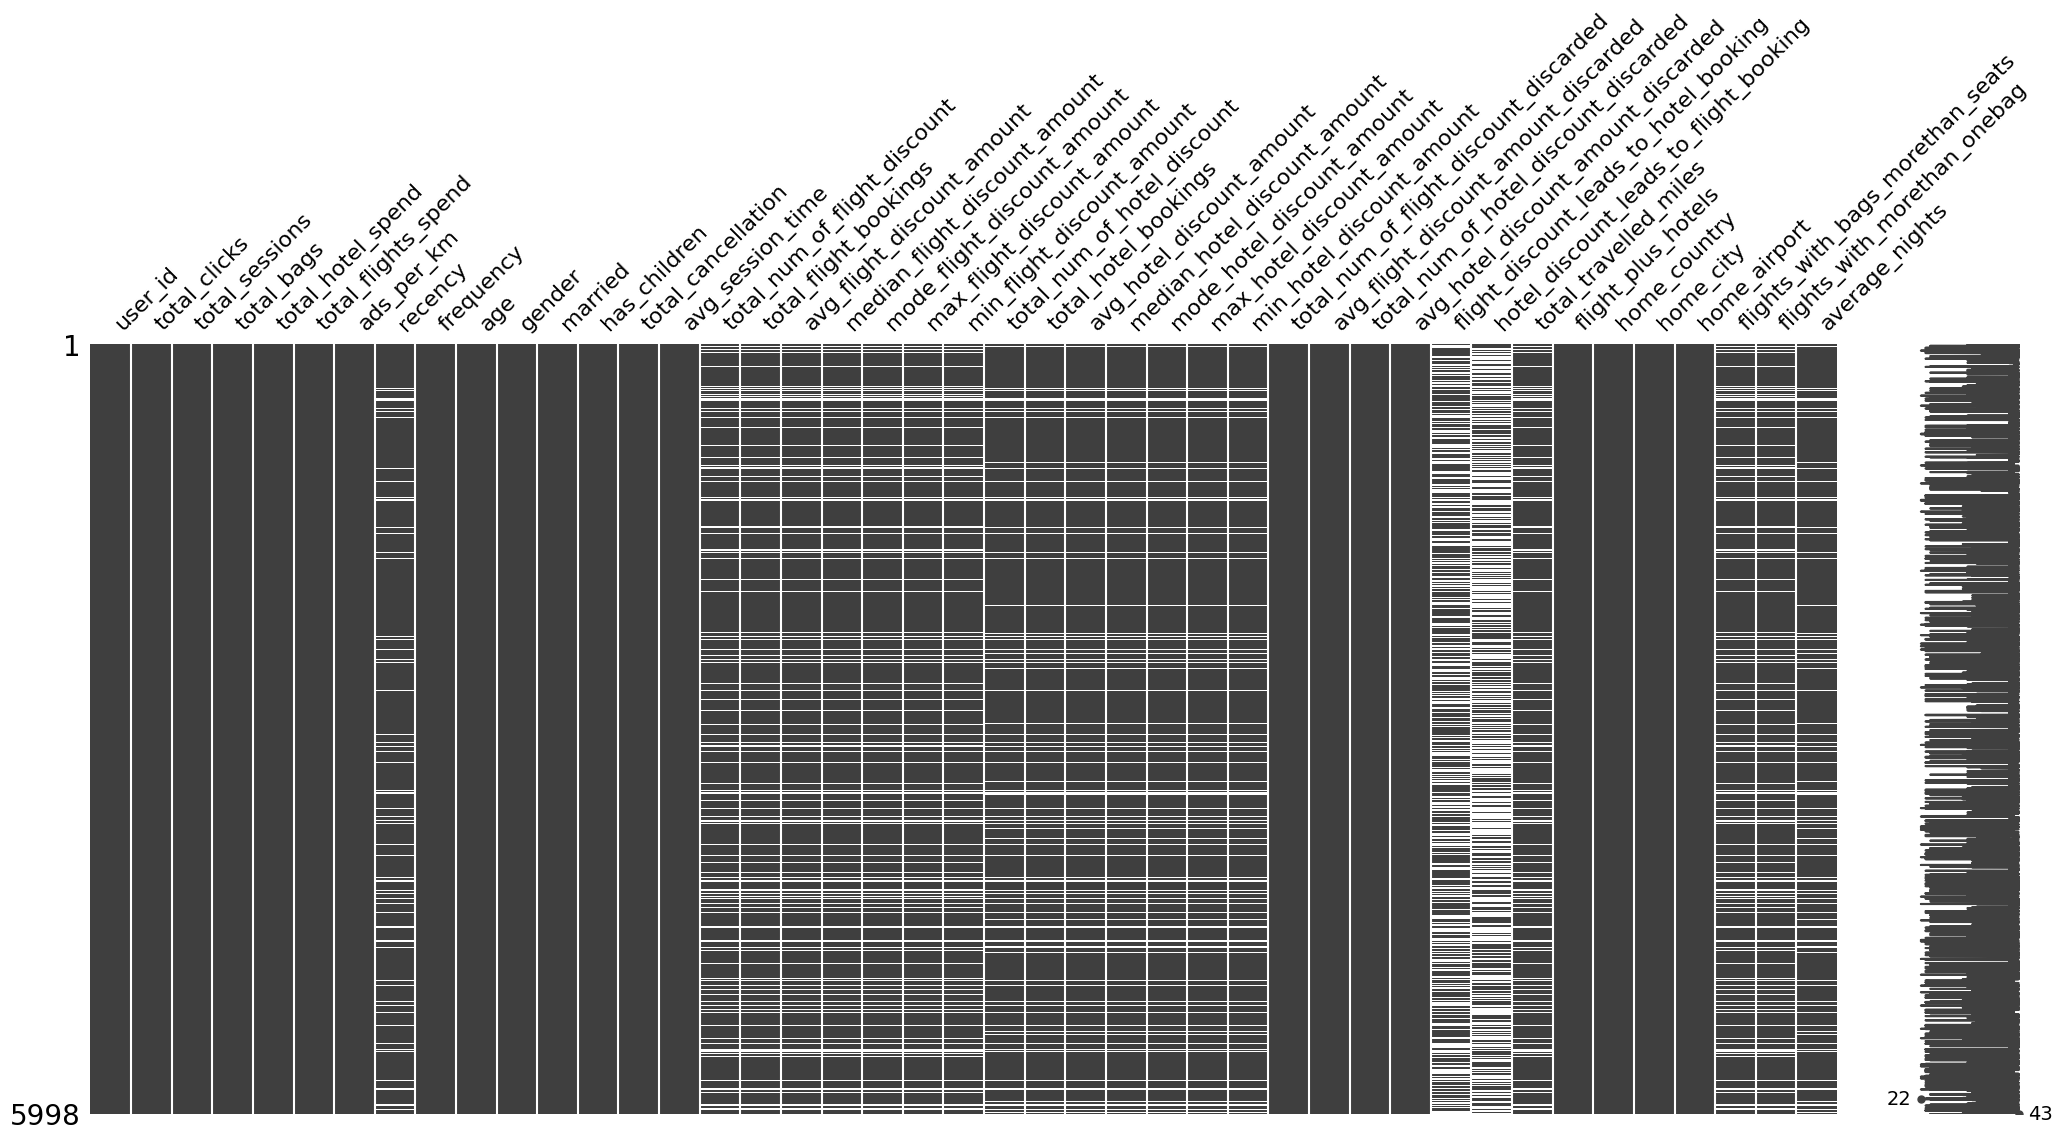

In [5]:
# Plot the nullity matrix
msno.matrix(df.iloc[:])
plt.show()

In [6]:
# Fill Nulls with zeros(as null represent clients with either no flight bookings , hotel bookings or clients with zero discount )
df.fillna(0,inplace=True)

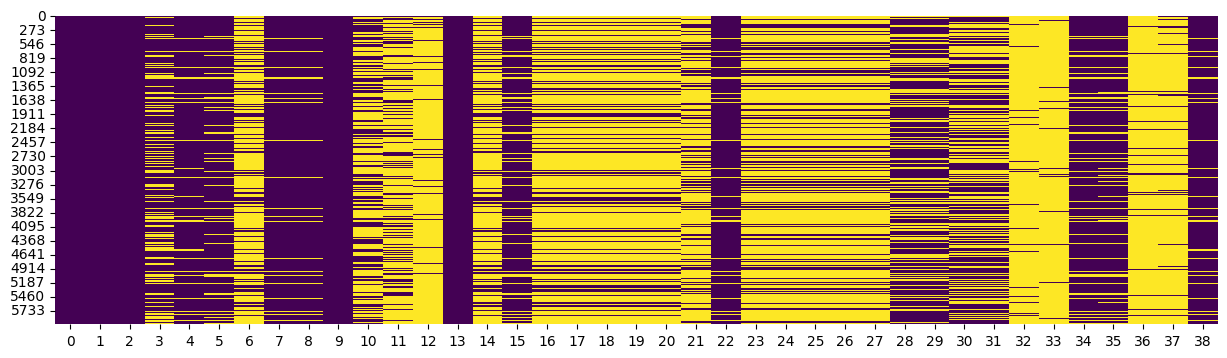

In [7]:
# Create a heatmap of zero values
plt.figure(figsize=(15,4))
sns.heatmap(np.isclose(df.select_dtypes(exclude='object'), 0, atol=0.0001), cmap='viridis', cbar=False)
plt.show()

In [8]:
# Check for duplicate values
df.duplicated().value_counts()

False    5998
dtype: int64

In [9]:
# Check for Negative values due to typo error
(df.select_dtypes(exclude='object').min()<0).value_counts()


False    37
True      2
dtype: int64

In [10]:
# Get columns with negative values
df.select_dtypes(exclude='object').columns[df.select_dtypes(exclude='object').min()<0]

Index(['total_hotel_spend', 'average_nights'], dtype='object')

In [11]:
# Change negative values into postive ones
df[['total_hotel_spend', 'average_nights']]=df[['total_hotel_spend', 'average_nights']].abs()
# Last Check
(df.select_dtypes(exclude='object').min()<0).value_counts()

False    39
dtype: int64

In [12]:
#Number of unique values for every feature
df.nunique().to_frame().T

,user_id,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,gender,married,has_children,total_cancellation,avg_session_time,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,home_country,home_city,home_airport,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights
0,5998,407,5,14,3064,5131,1719,206,18,71,3,2,2,3,2326,5,9,22,19,11,11,11,5,9,20,15,9,10,9,7,42,6,31,3,3,4944,9,2,105,159,5,5,151


###### The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.
###### Monte Carlo simulation has found that Shapiro–Wilk has the best power for a given significance (for samll samples n<50), followed closely by Anderson–Darling when comparing the Shapiro–Wilk, Kolmogorov–Smirnov, and Lilliefors.
###### For lage data sets (n>50) we can use KS(Kolmogórov-Smirnov) Test
###### In this case we need to know if our data normally distributed or not to choose a proper technique for removing outliers

KS Test for total_clicks:
   Statistic: 1.0000
   p-value: 0.0000


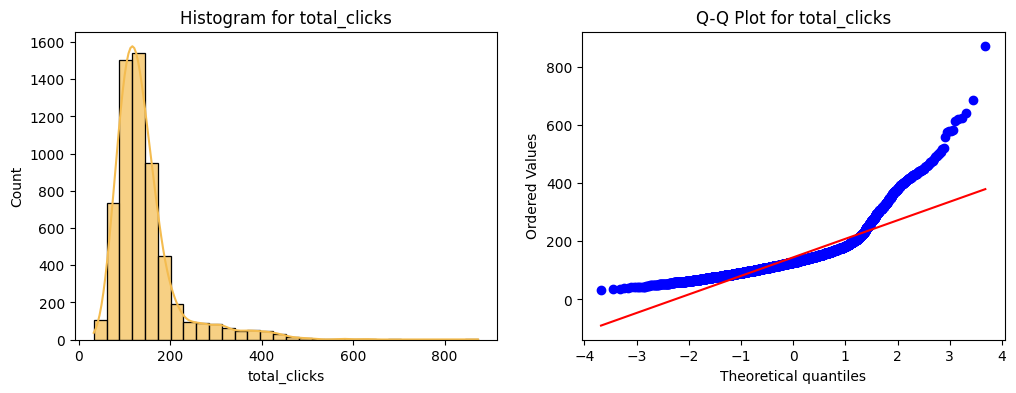

KS Test for total_bags:
   Statistic: 0.5241
   p-value: 0.0000


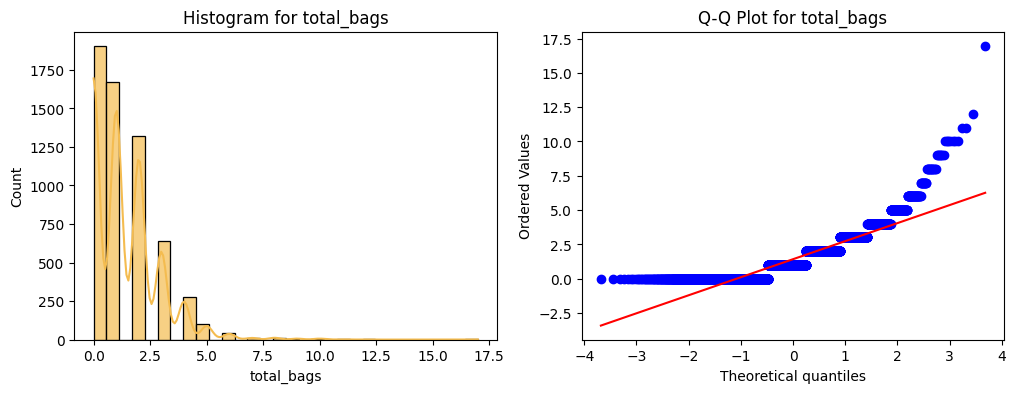

KS Test for total_hotel_spend:
   Statistic: 0.8850
   p-value: 0.0000


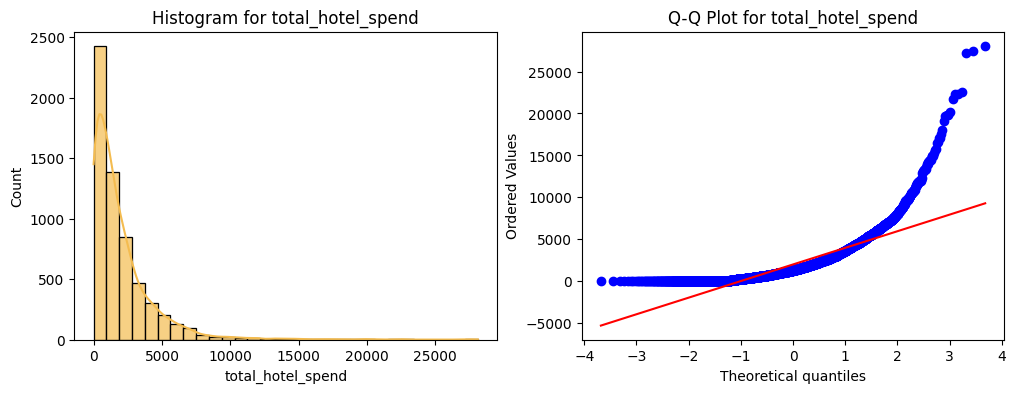

KS Test for total_flights_spend:
   Statistic: 0.8636
   p-value: 0.0000


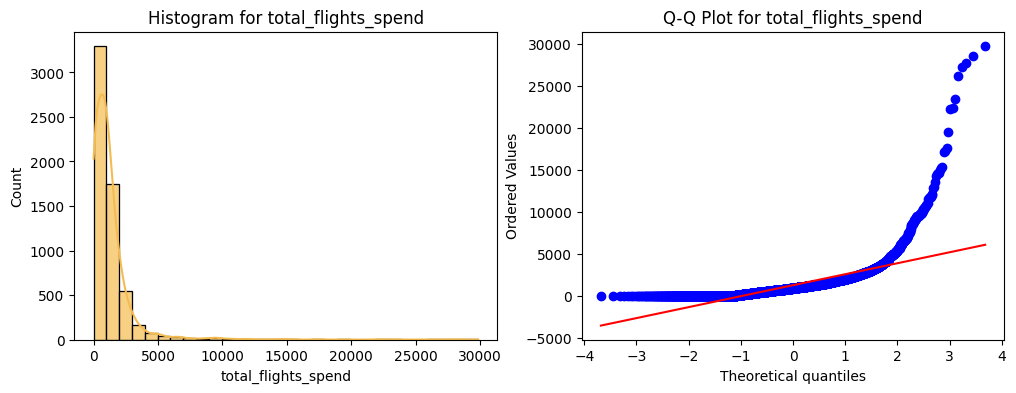

KS Test for ads_per_km:
   Statistic: 0.5000
   p-value: 0.0000


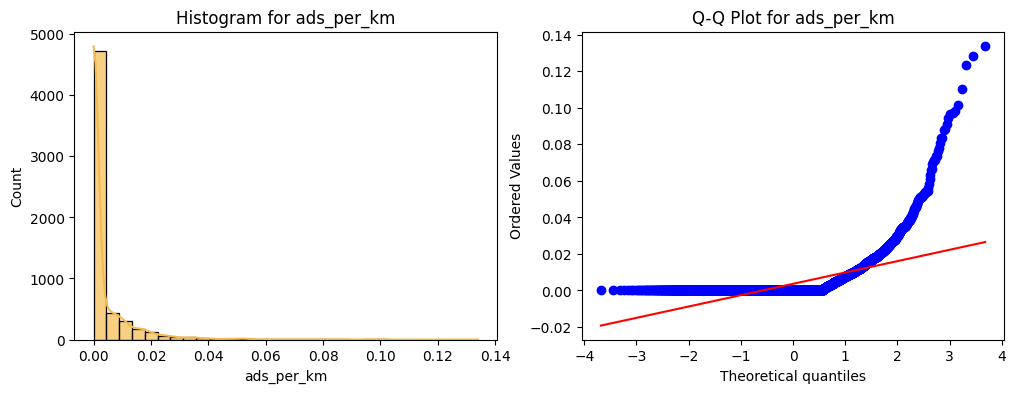

KS Test for recency:
   Statistic: 0.9205
   p-value: 0.0000


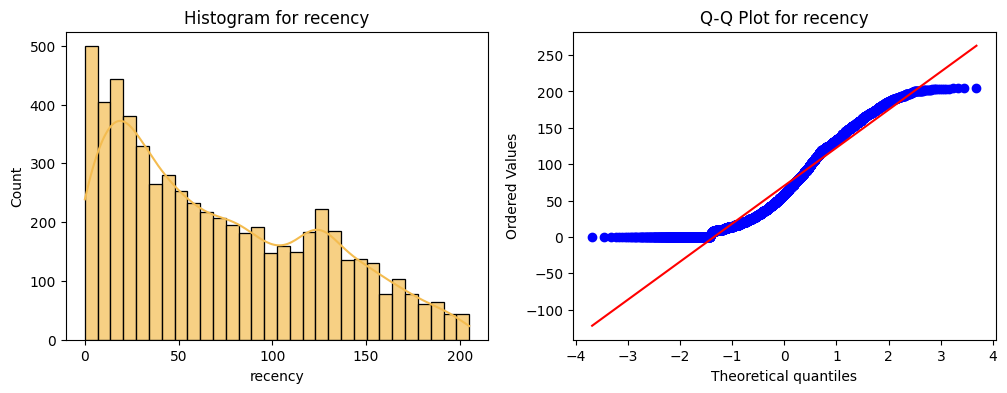

KS Test for frequency:
   Statistic: 0.8429
   p-value: 0.0000


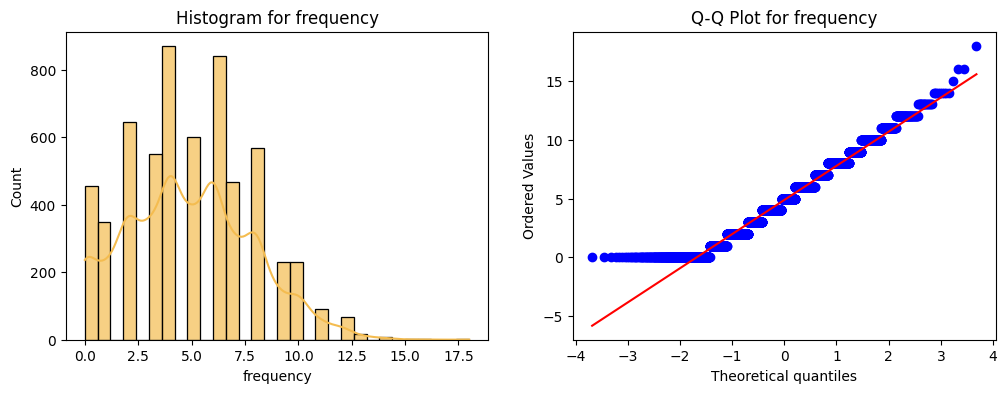

KS Test for age:
   Statistic: 1.0000
   p-value: 0.0000


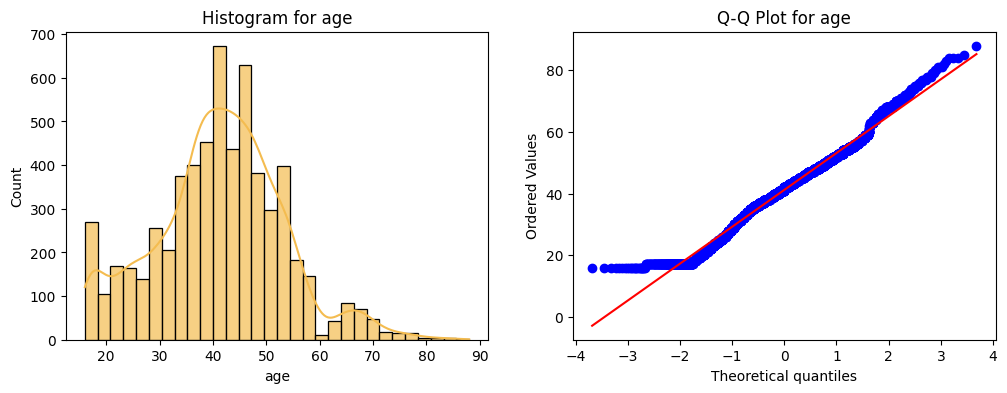

KS Test for avg_session_time:
   Statistic: 1.0000
   p-value: 0.0000


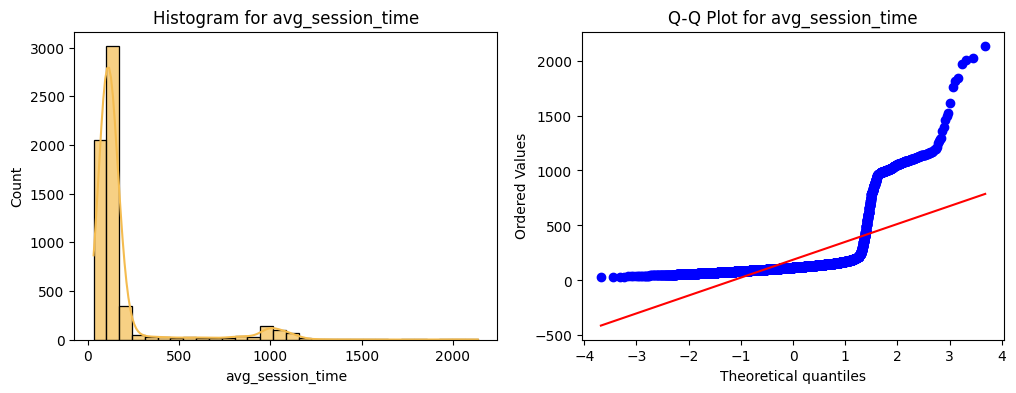

KS Test for avg_flight_discount_amount:
   Statistic: 0.5000
   p-value: 0.0000


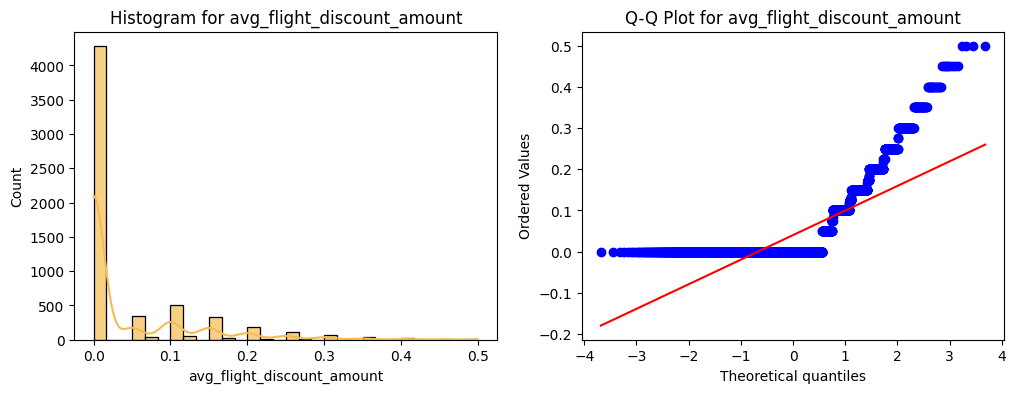

KS Test for median_flight_discount_amount:
   Statistic: 0.5000
   p-value: 0.0000


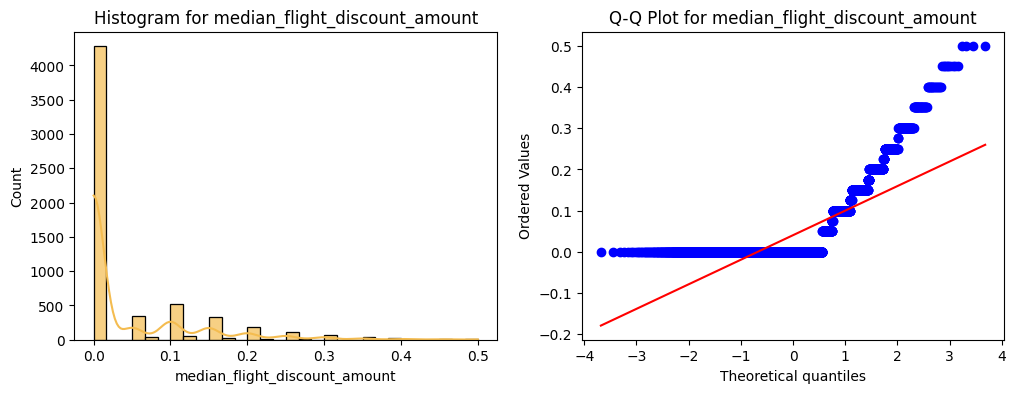

KS Test for mode_flight_discount_amount:
   Statistic: 0.5000
   p-value: 0.0000


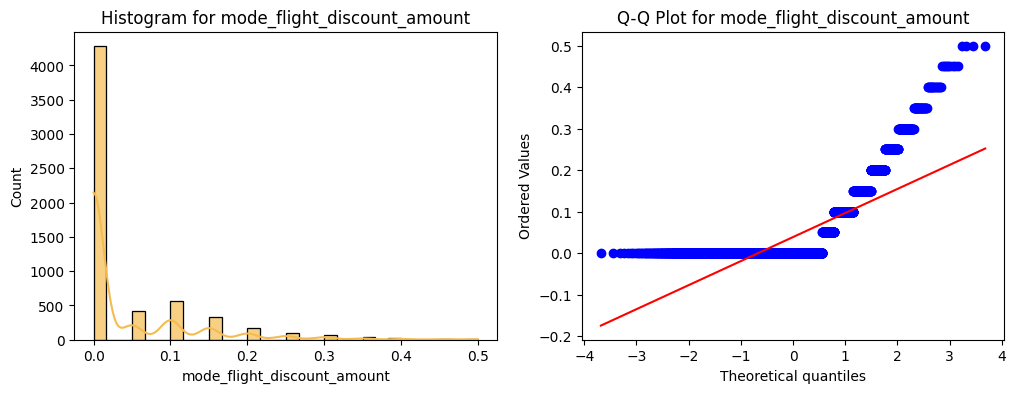

KS Test for max_flight_discount_amount:
   Statistic: 0.5000
   p-value: 0.0000


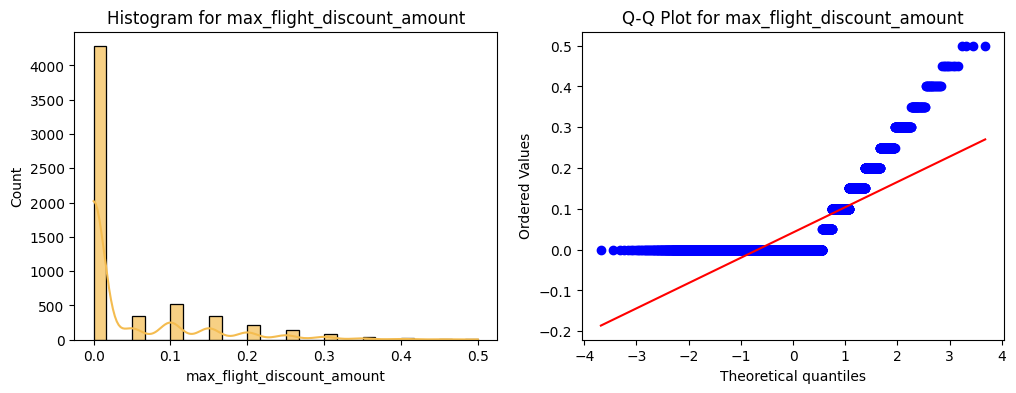

KS Test for min_flight_discount_amount:
   Statistic: 0.5000
   p-value: 0.0000


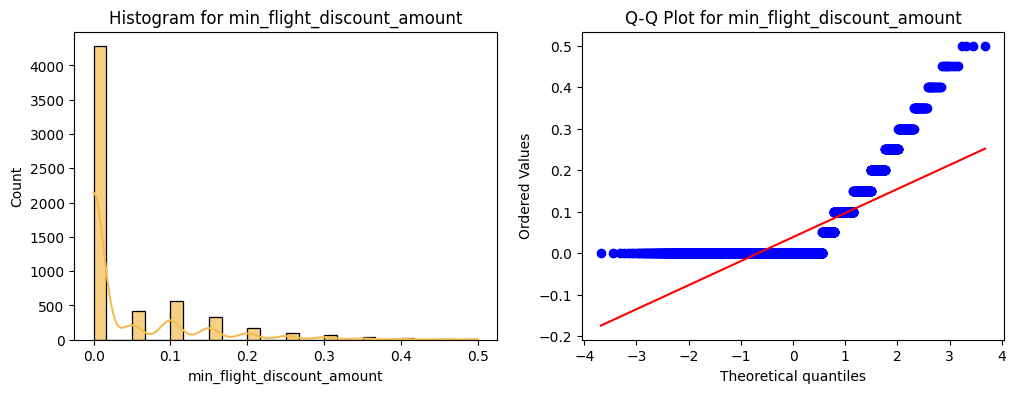

KS Test for avg_hotel_discount_amount:
   Statistic: 0.5000
   p-value: 0.0000


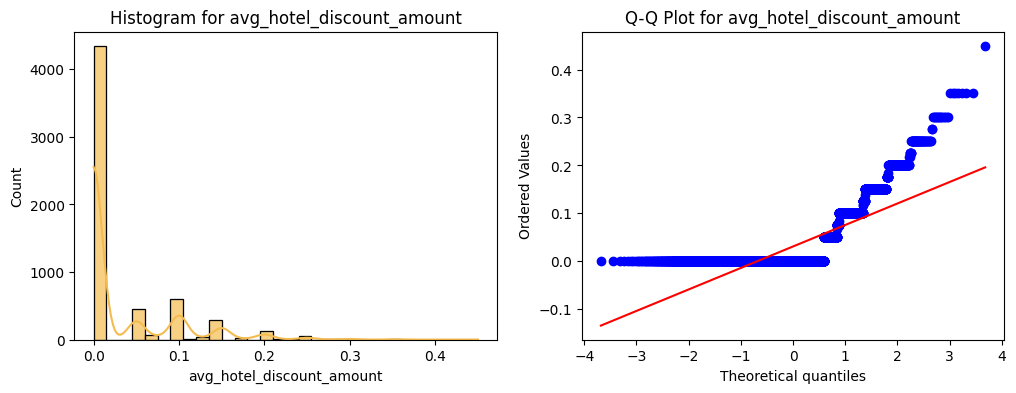

KS Test for median_hotel_discount_amount:
   Statistic: 0.5000
   p-value: 0.0000


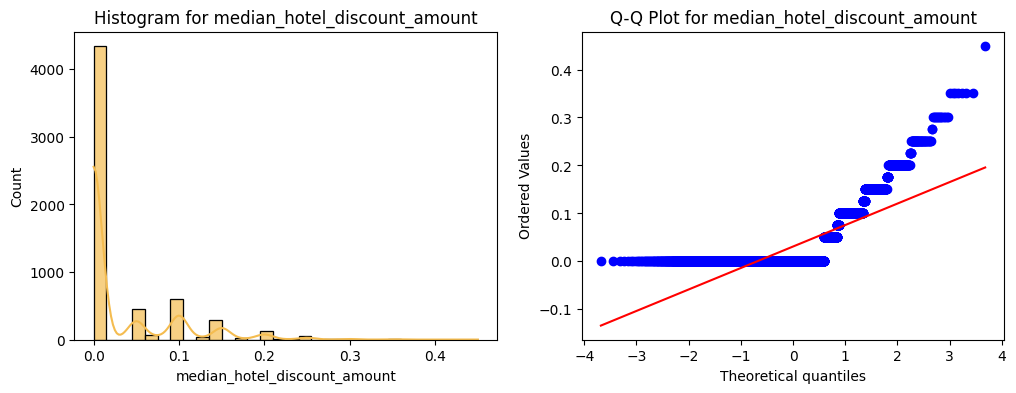

KS Test for max_hotel_discount_amount:
   Statistic: 0.5000
   p-value: 0.0000


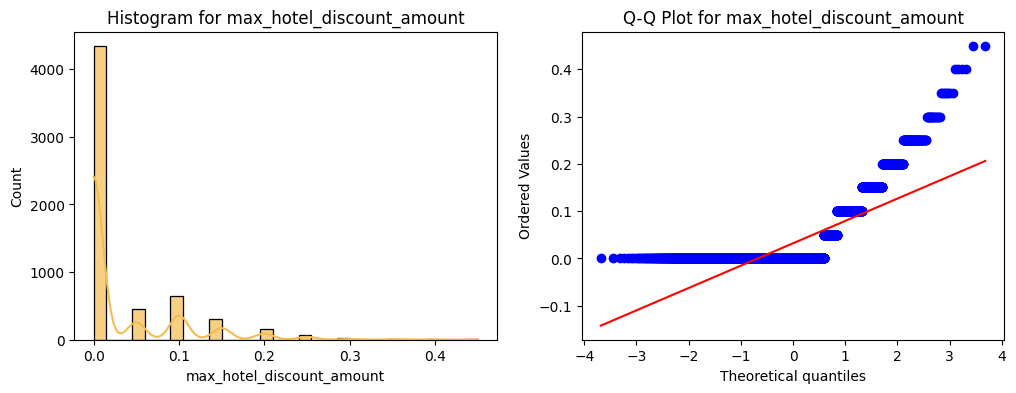

KS Test for avg_flight_discount_amount_discarded:
   Statistic: 0.5000
   p-value: 0.0000


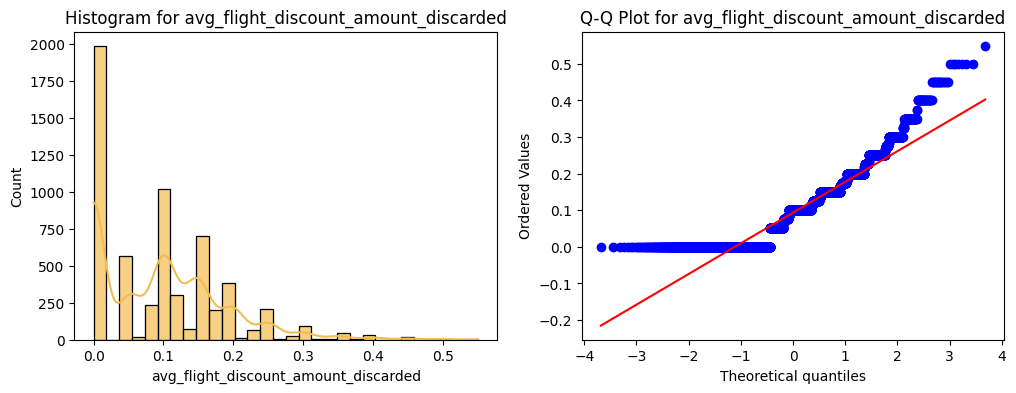

KS Test for avg_hotel_discount_amount_discarded:
   Statistic: 0.5000
   p-value: 0.0000


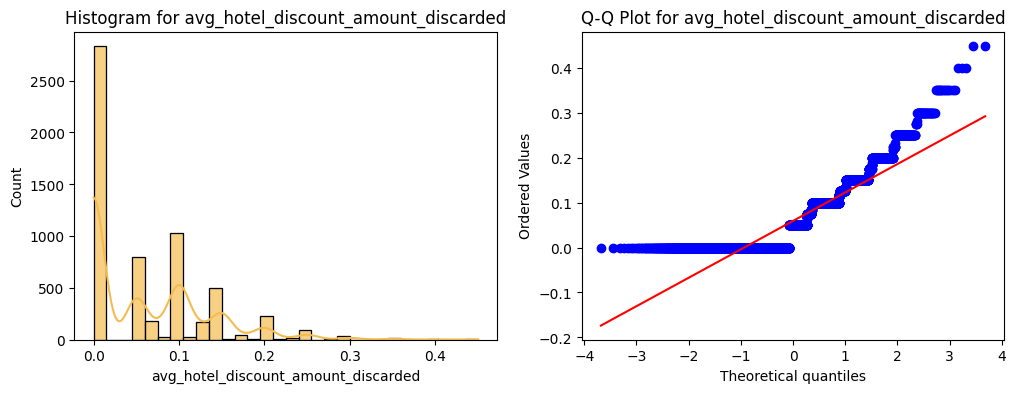

KS Test for total_travelled_miles:
   Statistic: 0.8633
   p-value: 0.0000


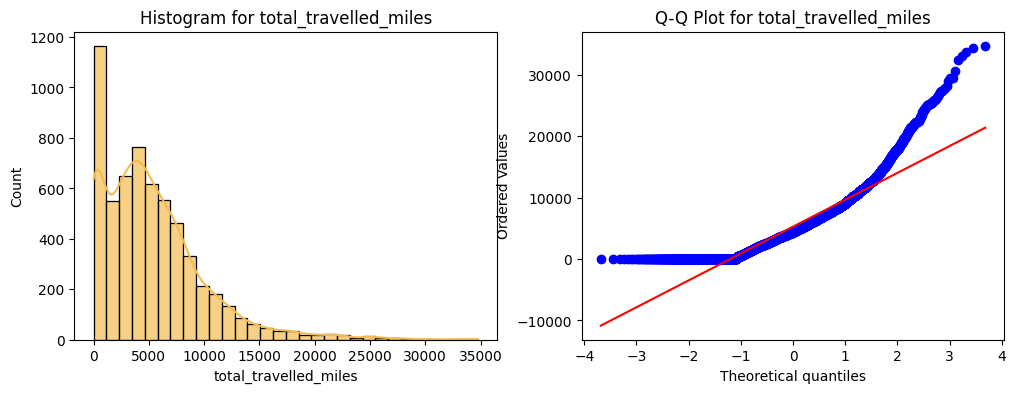

KS Test for average_nights:
   Statistic: 0.7133
   p-value: 0.0000


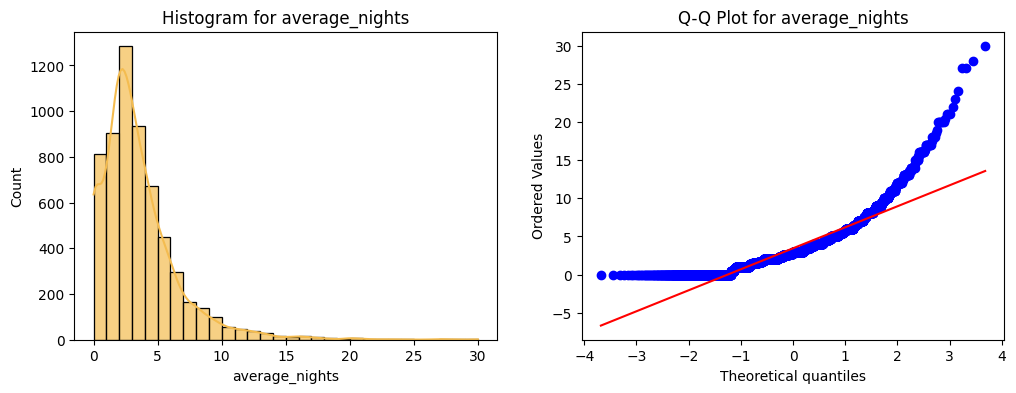

In [13]:
def check_normal_distribution(column):
    # KS test for normality
    stat, p_value = stats.kstest(column, 'norm')
    
    print(f"KS Test for {column.name}:")
    print(f"   Statistic: {stat:.4f}")
    print(f"   p-value: {p_value:.4f}")

    # Visual inspection using histograms and Q-Q plots with Seaborn
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram with Seaborn
    sns.histplot(column, bins=30, color='#f4bc50', edgecolor='black', alpha=0.7, ax=ax1, kde=True)
    ax1.set_title(f'Histogram for {column.name}')
    
    # Q-Q plot 
    stats.probplot(column, plot=ax2, fit=True)
    ax2.set_title(f'Q-Q Plot for {column.name}')
    
    plt.show()

# Check normal distribution for each column
for col in df[[f for f in df.drop(columns='user_id').select_dtypes(exclude='object').columns if df[f].nunique()>=10]].columns:
    check_normal_distribution(df[col])

In [14]:
# Check skewness by scipy
skew=stats.skew(df.select_dtypes(exclude='object').drop(columns='user_id'))
kurt = stats.kurtosis(df.select_dtypes(exclude='object').drop(columns='user_id'))
columns=df.select_dtypes(exclude='object').drop(columns='user_id').columns
skew_dict=dict(zip(columns,zip(skew,kurt)))
skew_frame=pd.DataFrame.from_dict(skew_dict,orient='columns')
# Rename the index labels
skew_frame.index = ['Skewness', 'Kurtosis']
skew_frame

,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,married,has_children,total_cancellation,avg_session_time,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights
Skewness,2.470804,2.315930,1.699057,3.251546,6.381250,5.191423,0.539938,0.294260,0.107240,0.239784,0.740259,2.883639,3.303565,1.635728,0.303885,2.227387,2.233317,2.340497,2.174713,2.342525,1.697071,0.283866,2.064529,2.065967,2.165062,2.154203,2.16841,0.761334,0.939188,1.048327,1.156521,4.281993,4.765341,1.555672,0.420231,3.755828,2.977541,2.078565
Kurtosis,8.848915,5.595419,6.332416,18.812904,67.740896,40.531252,-0.802462,-0.359877,0.207323,-1.942503,-1.452017,7.289274,10.686550,2.534207,-0.436320,5.202628,5.238747,5.904991,4.699604,5.918106,2.739184,-0.394527,4.274263,4.284628,4.940077,4.881102,4.96192,0.257327,1.024161,1.000783,1.194465,18.262170,22.125033,3.884054,-0.363111,17.212598,10.070615,7.781427


In [15]:
# from scipy.stats import jarque_bera

# # Assuming 'data' is your DataFrame
# for column in data.columns:
#     # Calculate Jarque-Bera test statistic and p-value for each column
#     jb_statistic, p_value = jarque_bera(data[column])
    
#     # Check if the p-value is below the significance level (e.g., 0.05)
#     if p_value < 0.05:
#         print(f"Column '{column}' is not normally distributed (reject the null hypothesis)")
#     else:
#         print(f"Column '{column}' appears to be normally distributed (fail to reject the null hypothesis)")

##### 
The values got for skewness and kurtosis indicate the degree of departure from normality in data.

Skewness measures the asymmetry of the distribution:

Positive skewness (skewness > 0) indicates that the tail on the right side of the distribution is longer or fatter than the left side.
Negative skewness (skewness < 0) indicates that the tail on the left side is longer or fatter than the right side.
Kurtosis measures the peakedness of the distribution:

Positive kurtosis (kurtosis > 0) indicates that the distribution is more peaked than a normal distribution.
Negative kurtosis (kurtosis < 0) indicates that the distribution is less peaked than a normal distribution.
Based on the values you provided:

Most of the skewness values are positive, indicating a right-skewed distribution for each variable.
Most of the kurtosis values are also positive, indicating that the distributions have heavier tails and are more peaked than a normal distribution.
These results suggest that your data distributions are likely heavy-tailed and deviate significantly from a normal distribution. You may consider further analysis using heavy-tailed distributions or transformations to address this deviation, depending on your specific analytical goals and assumptions.

##### Most of our data exhibits skewness, particularly skewed to the right, which is in line with our expectations given the nature of the variables we're analyzing for EX: "The 'total_flight_spend' variable is skewed to the right, as we anticipated, due to the presence of a few users who frequently book premium or international flights, resulting in a long tail on the higher end of the spending distribution. This is consistent with our expectations, as some users may travel more frequently or opt for higher-priced flights, leading to a skewed distribution towards higher spending values.


###### Ploting distribution and investigate removing outliers using IQR

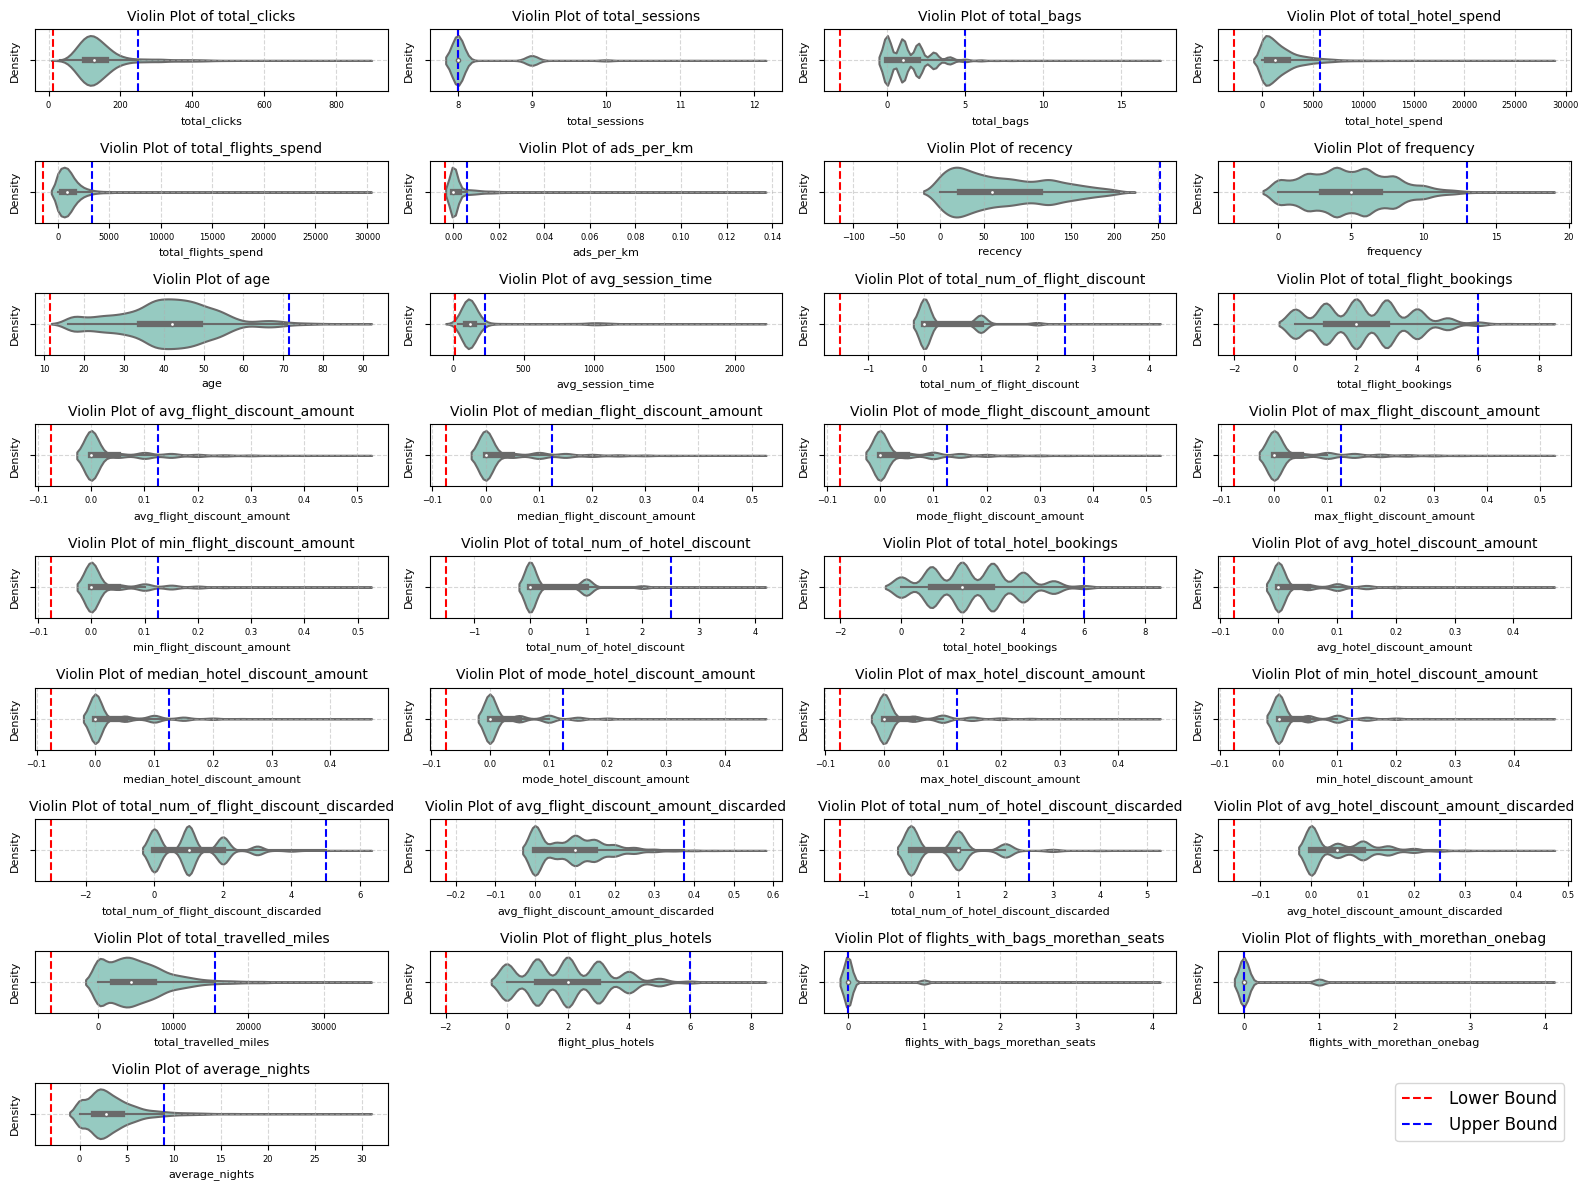

In [16]:
# Create a subplot grid
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Set color palette
sns.set_palette("Set3")

# For loop to draw Seaborn violin plots
for i, column in enumerate(df[[f for f in df.drop(columns='user_id').select_dtypes(exclude='object').columns if df[f].nunique() >= 5]]):
    # Draw Seaborn violin plot
    sns.violinplot(x=df[column], ax=axes[i])
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Add a horizontal line at the lower and upper bounds
    axes[i].axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    axes[i].axvline(x=upper_bound, color='blue', linestyle='--', label='Upper Bound')
    
    # Customize plot appearance
    axes[i].set_title(f"Violin Plot of {column}", fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)
    axes[i].set_ylabel("Density", fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=6)
    axes[i].grid(True, linestyle='--', alpha=0.5)
    
    
for n in range(33,36):
    fig.delaxes(ax=axes[n])


handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(.87,.1), fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

###### From the Violin plots we can see for some features it won't be effective way(senstive to skew data)(our data contains heavy tailed features) , and due to skewness in data we cant use z score.
###### We can use winsorization(if our data has a few instances)(technically it's the best solution in our case as these extremes are important for our analysis)
###### We can use model based techniques like Isolation forest (not senstive to feature scaling)

#### Removing outliers using Isolation forest

In [17]:
data=df[[f for f in df.drop(columns='user_id').select_dtypes(exclude='object').columns ]]

In [18]:
# lof = LocalOutlierFactor(contamination=0.1)
# outliers = lof.fit_predict(data)
# data["LOF"] = outliers
iso = IsolationForest(contamination='auto',random_state=42,bootstrap=True)
outliers = iso.fit_predict(data)
df["ISO"] = outliers

In [19]:
# Investigating size of outliers
df.ISO.value_counts()

 1    5105
-1     893
Name: ISO, dtype: int64

In [20]:
# Investigating outliers
df[(df.ISO==-1)]

,user_id,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,gender,married,has_children,total_cancellation,avg_session_time,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,home_country,home_city,home_airport,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights,ISO
0,23557,82,8,0,3802,0.00,0.000000,14.0,2,64,F,1,0,0,76.625000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.0,2.0,0.250,0.250,0.25,0.25,0.25,0.0,0.000,1.0,0.10,0.0,0.0,0.000000,0,usa,new york,LGA,0.0,0.0,10.00,-1
4,106907,240,8,10,8514,27804.12,0.000000,1.0,4,45,F,1,1,1,758.915066,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.000,0.000,0.00,0.00,0.00,0.0,0.000,0.0,0.00,0.0,0.0,12797.480541,1,usa,miami,TNT,0.0,1.0,11.00,-1
5,118043,164,8,3,5811,2339.29,0.000000,13.0,7,51,F,0,1,0,153.125000,0.0,3.0,0.00,0.00,0.00,0.00,0.00,2.0,4.0,0.150,0.150,0.05,0.25,0.05,2.0,0.200,1.0,0.05,0.0,1.0,7515.495499,2,usa,los angeles,LAX,0.0,0.0,5.50,-1
15,171470,446,8,1,0,11038.07,0.005450,18.0,5,24,F,0,0,2,1842.500000,1.0,1.0,0.10,0.10,0.10,0.10,0.10,0.0,0.0,0.000,0.000,0.00,0.00,0.00,0.0,0.000,0.0,0.00,0.0,0.0,17772.250904,0,usa,atlanta,ATL,0.0,0.0,0.00,-1
18,181157,153,8,3,5019,1039.43,0.022087,122.0,6,53,F,1,0,0,141.125000,1.0,3.0,0.15,0.15,0.15,0.15,0.15,1.0,3.0,0.150,0.150,0.15,0.15,0.15,1.0,0.200,0.0,0.00,0.0,0.0,3640.372453,3,usa,houston,HOU,0.0,1.0,3.33,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,730639,119,8,0,22340,0.00,0.000000,37.0,2,52,F,0,0,0,111.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,2.0,2.0,0.175,0.175,0.10,0.25,0.10,1.0,0.150,0.0,0.00,0.0,0.0,0.000000,0,usa,milwaukee,MKE,0.0,0.0,8.00,-1
5956,732729,175,8,0,5039,708.13,0.001595,47.0,8,41,F,0,1,0,163.750000,1.0,3.0,0.15,0.15,0.15,0.15,0.15,1.0,5.0,0.100,0.100,0.10,0.10,0.10,1.0,0.200,1.0,0.10,1.0,0.0,4507.747334,3,usa,columbus,CMH,0.0,0.0,3.80,-1
5968,742639,113,8,1,252,789.48,0.080713,17.0,3,52,F,1,1,0,104.625000,1.0,1.0,0.25,0.25,0.25,0.25,0.25,1.0,2.0,0.100,0.100,0.10,0.10,0.10,1.0,0.050,1.0,0.05,0.0,0.0,2445.317143,1,usa,oklahoma city,TIK,0.0,0.0,2.00,-1
5976,756030,157,8,1,1441,881.37,0.023577,55.0,6,35,F,0,1,0,146.625000,1.0,3.0,0.30,0.30,0.30,0.30,0.30,0.0,3.0,0.000,0.000,0.00,0.00,0.00,1.0,0.250,1.0,0.20,0.0,0.0,5040.182997,3,usa,tucson,DMA,0.0,0.0,1.67,-1


##### Although extreme instances will be removed for a better Exploratory Data Analysis (EDA), we recognize their significance in feature engineering and clustering, particularly in initiating bonus systems. These extreme values often represent high spenders for flights, hotels, or other aspects, providing valuable insight into customer behavior. Ignoring them in our loyalty bonus system would overlook a crucial segment of our customer base and the potential benefits they offer.

In [21]:
# Remove outlier
df_clean=df[(df['ISO']!= -1)].reset_index(drop=True)

In [22]:
df_clean.shape

(5105, 44)

In [23]:
# Save clean data
df_clean.drop(columns='ISO').to_csv('data_cleaned.csv',index=False)

In [24]:
data=df[[f for f in df.drop(columns='user_id').select_dtypes(exclude='object').columns ]]

In [25]:
from scipy.stats.mstats import winsorize
# Winsorization at 5th and 95th percentiles for all columns
lower_percentile = 25
upper_percentile = 75

# Apply Winsorization to each column
winsorized_data = data.apply(lambda x: winsorize(x,limits=[0.05, 0.2]).astype(float))

# df[[f for f in df.drop(columns='user_id').select_dtypes(exclude='object').columns ]]=df[[f for f in df.drop(columns='user_id').select_dtypes(exclude='object').columns ]].apply(lambda x: winsorize(x,limits=[0.05, 0.2]).astype(float))

In [26]:
# df.to_csv('data_cleaned(win).csv',index=False)

In [27]:
winsorized_data.describe()


,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,married,has_children,total_cancellation,avg_session_time,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights,ISO
count,5998.000000,5998.0,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.0,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.00000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.0,5998.0,5998.000000,5998.000000,5998.0,5998.0,5998.000000,5998.000000
mean,128.260587,8.0,1.086362,1457.571024,914.313489,0.001277,64.333278,4.640047,39.746415,0.440480,0.326442,0.0,117.307896,0.286429,2.187229,0.025681,0.025675,0.02520,0.025817,0.025192,0.276759,2.284928,0.018855,0.018844,0.013838,0.023875,0.013838,0.957486,0.077736,0.527676,0.045298,0.0,0.0,4429.140840,1.776425,0.0,0.0,2.831606,0.702234
std,32.383864,0.0,0.844729,1096.431082,628.687530,0.002137,44.304257,2.542809,9.477383,0.496486,0.468950,0.0,29.759838,0.452130,1.337168,0.041921,0.041915,0.04139,0.042121,0.041380,0.447434,1.284718,0.031043,0.031027,0.022372,0.040344,0.022372,0.786131,0.062193,0.499275,0.045647,0.0,0.0,2927.347140,1.112722,0.0,0.0,1.683909,0.712005
min,72.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.0,66.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,-1.000000
25%,102.000000,8.0,0.000000,464.000000,372.390000,0.000000,23.000000,3.000000,34.000000,0.000000,0.000000,0.0,93.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1965.711237,1.000000,0.0,0.0,1.500000,1.000000
50%,127.000000,8.0,1.000000,1256.000000,885.040000,0.000000,59.000000,5.000000,42.000000,0.000000,0.000000,0.0,116.375000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.100000,1.000000,0.050000,0.0,0.0,4412.837566,2.000000,0.0,0.0,2.830000,1.000000
75%,161.000000,8.0,2.000000,2588.750000,1539.977500,0.002483,115.000000,7.000000,49.000000,1.000000,1.000000,0.0,147.375000,1.000000,3.000000,0.050000,0.050000,0.05000,0.050000,0.050000,1.000000,3.000000,0.050000,0.050000,0.050000,0.050000,0.050000,2.000000,0.150000,1.000000,0.100000,0.0,0.0,7406.747776,3.000000,0.0,0.0,4.500000,1.000000
max,171.000000,8.0,2.000000,3026.000000,1771.880000,0.005181,124.000000,8.000000,50.000000,1.000000,1.000000,0.0,156.875000,1.000000,4.000000,0.100000,0.100000,0.10000,0.100000,0.100000,1.000000,4.000000,0.075000,0.075000,0.050000,0.100000,0.050000,2.000000,0.150000,1.000000,0.100000,0.0,0.0,8223.035476,3.000000,0.0,0.0,5.000000,1.000000


In [28]:
df_clean.drop(columns='user_id').describe()

,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,married,has_children,total_cancellation,avg_session_time,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights,ISO
count,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.0
mean,135.126347,8.186876,1.211557,1728.451126,1028.546039,0.002110,72.207444,4.472086,41.059745,0.436827,0.321058,0.066405,158.252174,0.233888,2.116748,0.023805,0.023786,0.022977,0.024672,0.022958,0.242116,2.222527,0.020463,0.020451,0.019755,0.021185,0.019755,1.074829,0.094475,0.711459,0.058507,0.048580,0.033301,4731.939400,1.843487,0.057982,0.086386,3.335775,1.0
std,59.908926,0.436779,1.208765,2067.930109,1138.885323,0.005861,55.211795,2.743554,12.371049,0.496042,0.466929,0.252142,189.816336,0.480566,1.431455,0.052135,0.052111,0.050796,0.054554,0.050747,0.490654,1.383910,0.043606,0.043563,0.042271,0.045885,0.042271,0.969703,0.088480,0.800908,0.068785,0.223059,0.182684,4158.260727,1.359250,0.237887,0.290559,2.980219,0.0
min,33.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,99.000000,8.000000,0.000000,402.000000,313.910000,0.000000,23.000000,2.000000,34.000000,0.000000,0.000000,0.000000,90.875000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1603.079962,1.000000,0.000000,0.000000,1.500000,1.0
50%,124.000000,8.000000,1.000000,1133.000000,797.380000,0.000000,61.000000,4.000000,41.000000,0.000000,0.000000,0.000000,112.750000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.100000,1.000000,0.050000,0.000000,0.000000,4087.943811,2.000000,0.000000,0.000000,2.670000,1.0
75%,153.000000,8.000000,2.000000,2340.000000,1370.940000,0.000000,119.000000,6.000000,49.000000,1.000000,1.000000,0.000000,140.500000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.150000,1.000000,0.100000,0.000000,0.000000,6834.603925,3.000000,0.000000,0.000000,4.500000,1.0
max,642.000000,12.000000,9.000000,28114.000000,15334.040000,0.088529,205.000000,14.000000,88.000000,1.000000,1.000000,2.000000,2025.125000,4.000000,7.000000,0.300000,0.300000,0.300000,0.350000,0.300000,4.000000,8.000000,0.250000,0.250000,0.250000,0.450000,0.250000,6.000000,0.550000,5.000000,0.450000,2.000000,2.000000,33766.687846,6.000000,2.000000,2.000000,30.000000,1.0


In [29]:
df.drop(columns='user_id').describe()

,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,married,has_children,total_cancellation,avg_session_time,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights,ISO
count,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000
mean,144.308436,8.204568,1.410637,1951.030010,1251.185867,0.003616,70.379460,4.874792,41.205402,0.440480,0.326442,0.101701,187.060316,0.328443,2.285762,0.040241,0.040172,0.038738,0.041839,0.038713,0.321607,2.385629,0.030642,0.030610,0.029301,0.032052,0.029268,1.052351,0.093383,0.712904,0.059398,0.055018,0.042514,5276.016159,1.988496,0.081194,0.123374,3.436299,0.702234
std,72.330165,0.460911,1.447175,2334.725723,1771.762935,0.009433,54.085685,2.944514,12.049180,0.496486,0.468950,0.310444,241.058619,0.558854,1.512562,0.077203,0.077125,0.075563,0.080262,0.075535,0.561481,1.461246,0.057935,0.057888,0.056113,0.061355,0.056071,0.967158,0.089248,0.804939,0.070331,0.235234,0.205055,4661.345049,1.439585,0.286852,0.353336,2.998515,0.712005
min,33.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,102.000000,8.000000,0.000000,464.000000,372.390000,0.000000,23.000000,3.000000,34.000000,0.000000,0.000000,0.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1965.711237,1.000000,0.000000,0.000000,1.500000,1.000000
50%,127.000000,8.000000,1.000000,1256.000000,885.040000,0.000000,59.000000,5.000000,42.000000,0.000000,0.000000,0.000000,116.375000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.100000,1.000000,0.050000,0.000000,0.000000,4412.837566,2.000000,0.000000,0.000000,2.830000,1.000000
75%,161.000000,8.000000,2.000000,2588.750000,1539.977500,0.002483,115.000000,7.000000,49.000000,1.000000,1.000000,0.000000,147.375000,1.000000,3.000000,0.050000,0.050000,0.050000,0.050000,0.050000,1.000000,3.000000,0.050000,0.050000,0.050000,0.050000,0.050000,2.000000,0.150000,1.000000,0.100000,0.000000,0.000000,7406.747776,3.000000,0.000000,0.000000,4.500000,1.000000
max,873.000000,12.000000,17.000000,28114.000000,29829.150000,0.133988,205.000000,18.000000,88.000000,1.000000,1.000000,2.000000,2137.625000,4.000000,8.000000,0.500000,0.500000,0.500000,0.500000,0.500000,4.000000,8.000000,0.450000,0.450000,0.450000,0.450000,0.450000,6.000000,0.550000,5.000000,0.450000,2.000000,2.000000,34764.998888,8.000000,4.000000,4.000000,30.000000,1.000000
